In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap

## Figure 3B

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_81289/3155548789.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set3')


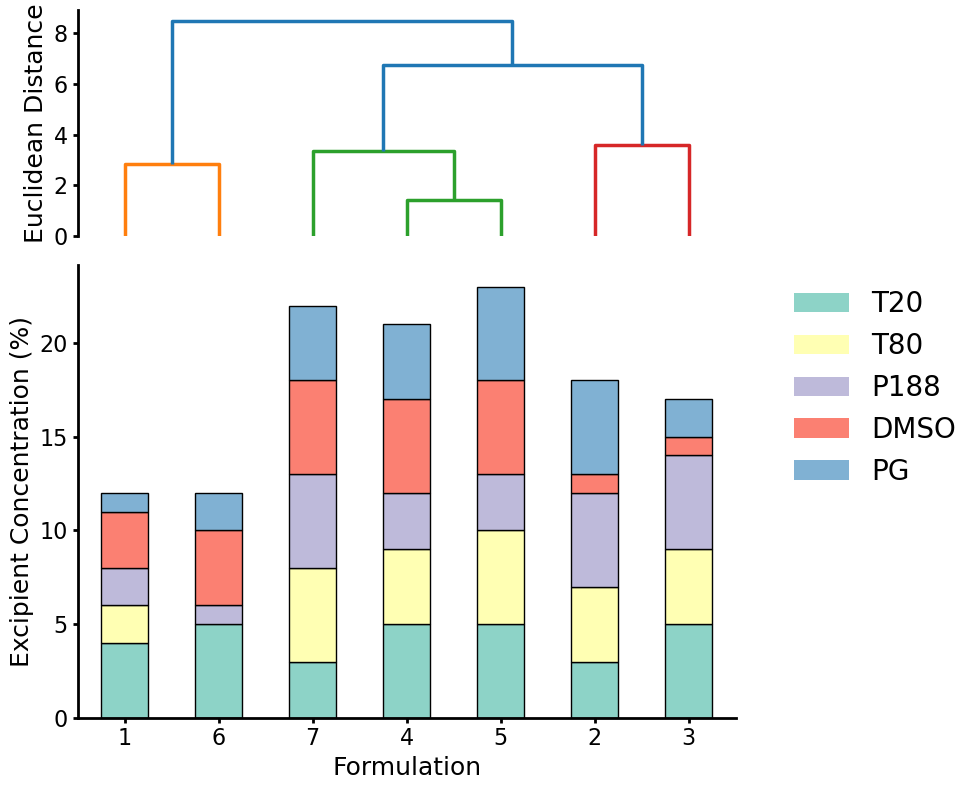

In [31]:
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

concs = pd.read_excel("lead_formulation_selection.xlsx", sheet_name="not_normalised")

# clustering
linked = sch.linkage(concs, method='ward', metric='euclidean')

# subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2]})

# dendrogram
g = sch.dendrogram(linked, labels=['1', '2', '3', '4', '5', '6', '7'], ax=ax1)

# Adjust line thickness in the dendrogram
for line in ax1.collections:
    line.set_linewidth(2.5)  # Set desired line thickness for all dendrogram lines

ax1.set_xticks([])
ax1.spines['bottom'].set_visible(False)
ax1.set_ylabel('Euclidean Distance', size=18)
ax1.tick_params(axis='y', labelsize=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for spine in ax1.spines.values():
    spine.set_linewidth(2)

colors = cm.get_cmap('Set3')

bar_data = concs.iloc[[0, 5, 6, 3, 4, 1, 2]]

bar_data.plot(kind='bar', stacked=True, ax=ax2, color=colors(range(concs.shape[1])))

ax2.set_xticklabels(['1', '6', '7', '4', '5', '2', '3'], rotation=0, size=16)
ax2.set_xlabel('Formulation', size=18)
ax2.set_ylabel('Excipient Concentration (%)', size=18)
ax2.spines['top'].set_visible(False)
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left",fontsize=20, frameon = False)
ax2.tick_params(axis='y', labelsize=16)
ax2.spines['right'].set_visible(False)


for spine in ax2.spines.values():
    spine.set_linewidth(2)
ax1.tick_params(axis='both', width=2)
ax2.tick_params(axis='both', width=2)

for container in ax2.containers:
    for bar in container:
        bar.set_edgecolor('black')
        bar.set_linewidth(1)

plt.tight_layout()

plt.show()

## Figure 3A

In [11]:
master_results = pd.read_csv("master_results.csv")
master_results

,T20,T80,P188,DMSO,PG,Rep 1 Absorbance,Rep 2 Absorbance,Rep 3 Absorbance,Mean Absorbance,Std Absorbance,Round Number,Relative SD
0,4,3,1,2,2,0.2357,0.1137,0.2577,0.202367,0.077571,0,NaN
1,5,2,3,4,2,0.1957,0.3127,0.2997,0.269367,0.064127,0,NaN
2,1,4,2,3,1,0.1407,0.2477,0.0847,0.157700,0.082819,0,NaN
3,2,3,4,2,4,0.1297,0.3887,0.1207,0.213033,0.152198,0,NaN
4,1,2,3,3,2,0.1327,0.1867,0.0767,0.132033,0.055003,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
246,3,1,1,5,2,0.2250,0.1160,0.1630,0.168000,0.054672,5,32.542707
247,4,5,0,4,5,0.2490,0.1200,0.1810,0.183333,0.064532,5,35.199080
248,5,4,1,1,3,0.1280,0.1450,0.1200,0.131000,0.012767,5,9.745912
249,4,2,3,5,2,0.2970,0.2470,0.1880,0.244000,0.054562,5,22.361431


In [12]:
# convert mean absorbance into concentration mg/mL
master_results["mean_curcumin_conc"] = ((master_results["Mean Absorbance"]-0.0051)/68.628)*1000 
master_results.to_csv("master_results_with_solubility.csv", index=False)
master_results

,T20,T80,P188,DMSO,PG,Rep 1 Absorbance,Rep 2 Absorbance,Rep 3 Absorbance,Mean Absorbance,Std Absorbance,Round Number,Relative SD,mean_curcumin_conc
0,4,3,1,2,2,0.2357,0.1137,0.2577,0.202367,0.077571,0,NaN,2.874434
1,5,2,3,4,2,0.1957,0.3127,0.2997,0.269367,0.064127,0,NaN,3.850712
2,1,4,2,3,1,0.1407,0.2477,0.0847,0.157700,0.082819,0,NaN,2.223582
3,2,3,4,2,4,0.1297,0.3887,0.1207,0.213033,0.152198,0,NaN,3.029861
4,1,2,3,3,2,0.1327,0.1867,0.0767,0.132033,0.055003,0,NaN,1.849585
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3,1,1,5,2,0.2250,0.1160,0.1630,0.168000,0.054672,5,32.542707,2.373667
247,4,5,0,4,5,0.2490,0.1200,0.1810,0.183333,0.064532,5,35.199080,2.597094
248,5,4,1,1,3,0.1280,0.1450,0.1200,0.131000,0.012767,5,9.745912,1.834528
249,4,2,3,5,2,0.2970,0.2470,0.1880,0.244000,0.054562,5,22.361431,3.481086


In [13]:
# Define the bins

df = master_results
bins = np.arange(0, 13.5, 0.5)  # Bins from 0 to 13 with 0.5 intervals

df['Bin'] = pd.cut(df['mean_curcumin_conc'], bins=bins, include_lowest=True)

binned_df = df.groupby(['Round Number', 'Bin']).size().unstack(fill_value=0)

binned_df.reset_index(inplace=True)
binned_df.columns.name = None
binned_df

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_78016/4091300018.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby(['Round Number', 'Bin']).size().unstack(fill_value=0)


,Round Number,"(-0.001, 0.5]","(0.5, 1.0]","(1.0, 1.5]","(1.5, 2.0]","(2.0, 2.5]","(2.5, 3.0]","(3.0, 3.5]","(3.5, 4.0]","(4.0, 4.5]",...,"(8.0, 8.5]","(8.5, 9.0]","(9.0, 9.5]","(9.5, 10.0]","(10.0, 10.5]","(10.5, 11.0]","(11.0, 11.5]","(11.5, 12.0]","(12.0, 12.5]","(12.5, 13.0]"
0,0,1,6,10,18,14,18,9,4,4,...,0,2,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,3,8,9,...,0,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,3,6,4,6,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,1,0,...,3,4,1,1,2,1,0,0,2,1
4,4,0,0,0,0,0,0,0,2,0,...,2,1,0,1,0,1,0,0,0,0
5,5,0,0,0,3,4,4,4,4,3,...,1,2,0,0,0,0,0,0,0,1


In [41]:
import scipy.stats as stats

all_data = master_results['mean_curcumin_conc']

stat, p_value = stats.shapiro(all_data)

print(f'Statistic={stat:.3f}, p-value={p_value:.3f}')

if p_value > 0.05:
    print('The data looks Gaussian (fail to reject H0)')
else:
    print('The data does not look Gaussian (reject H0)')


Statistic=0.942, p-value=0.000
The data does not look Gaussian (reject H0)


In [68]:
round_range = range(1,6)

for round_num in round_range:
    base = master_results[master_results['Round Number'] == 0]['mean_curcumin_conc']
    data = master_results[master_results['Round Number'] == round_num]['mean_curcumin_conc']
    stat, p_value = stats.mannwhitneyu(base, data)
    print(f'Round {round_num}: Statistics={stat:.3f}, p={p_value}')

Round 1: Statistics=503.000, p=3.280653366574068e-08
Round 2: Statistics=447.000, p=5.218339368838555e-09
Round 3: Statistics=97.000, p=5.973102997196453e-15
Round 4: Statistics=150.000, p=6.04744902891194e-14
Round 5: Statistics=800.000, p=0.00011396447082796689


In [94]:
# Function for plotting error bars
def ploterror(x1, x2, y, text, multiplication = 0.5):
    h = 0.5
    col = "k"
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col, clip_on = False)
    plt.text((x1+x2)*multiplication, y+h+0.25, text, ha='center', va='bottom', color=col)

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_78016/1982683404.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_box = sns.boxplot(x='Round Number', y='mean_curcumin_conc', data=master_results, palette=cmap)
/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_78016/1982683404.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels(["Seed", 1,2,3,4,5], size=16)


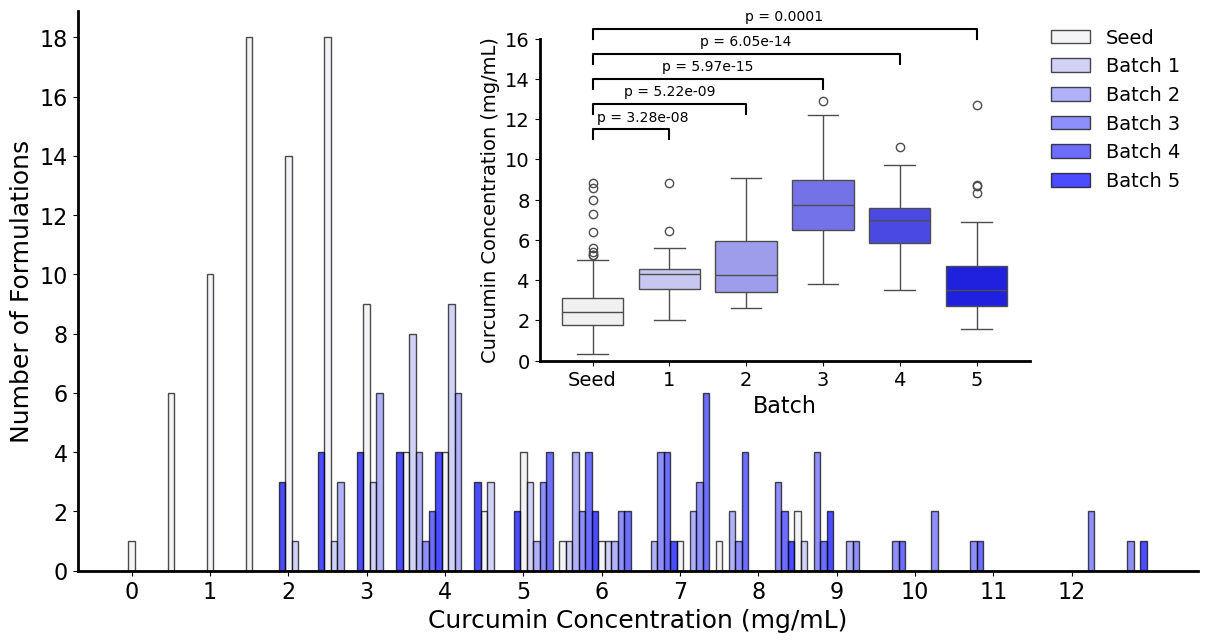

In [106]:
fig, ax = plt.subplots(figsize=(14, 7))

cmap = sns.color_palette("light:b", as_cmap=False)

bin_labels = [f'{interval.left:.1f} - {interval.right:.1f}' for interval in binned_df.columns[1:]]

n_rounds = len(binned_df['Round Number'].unique())
bar_width = 1 / n_rounds  # total width for each bin divided by number of round numbers

x_positions = np.arange(len(bin_labels))

colors = cmap[:n_rounds]  

for i, round_num in enumerate(binned_df['Round Number'].unique()):
    subset = binned_df[binned_df['Round Number'] == round_num]
    
    ax.bar(x_positions + i * bar_width, subset.iloc[0, 1:], width=bar_width, 
           label=f'Round {round_num}', color=colors[i], edgecolor='black', alpha=0.7)

ax_box = fig.add_axes([0.43, 0.4, 0.35, 0.46])
ax_box = sns.boxplot(x='Round Number', y='mean_curcumin_conc', data=master_results, palette=cmap)


for spine in ax_box.spines.values():
    spine.set_linewidth(2)

ax_box.grid(False) 
ax_box.set_xlabel('Batch', size=16) 

ax_box.set_xticklabels(["Seed", 1,2,3,4,5], size=16) 
ax_box.set_ylim(0,16)


ax_box.set_ylabel('Curcumin Concentration (mg/mL)', size=14) 
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.tick_params(axis='both', which='major', labelsize=14) 

# Configure the main axis (bar plot)
ax.set_xlabel('Curcumin Concentration (mg/mL)', size=18)  
ax.set_ylabel('Number of Formulations', size=18)  

ax.set_yticks([0,2,4,6,8,10,12,14,16,18])  

ax.set_xticks(ticks=np.arange(0, len(bin_labels), step=2))
ax.set_xticklabels(np.arange(0, 13, step=1), size=16)  
ax.tick_params(axis='y', labelsize=16) 

for spine in ax.spines.values():
    spine.set_linewidth(2)

ax.legend(loc='upper right', fontsize=14, labels = ["Seed", "Batch 1", "Batch 2", "Batch 3", "Batch 4", "Batch 5"], frameon = False) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.3)

# Add p values
ploterror(0, 1, 11, "p = 3.28e-08", 0.65)
ploterror(0, 2, 12.25, "p = 5.22e-09")
ploterror(0, 3, 13.5, "p = 5.97e-15")
ploterror(0, 4, 14.75, "p = 6.05e-14")
ploterror(0, 5, 16, "p = 0.0001")

plt.show()